In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [9]:
films=pd.read_csv('..\data/films_updated.csv')
actor_cod=pd.read_csv('..\data/actor_code.csv')
actor_detail=pd.read_csv('..\data/actor_detail.csv')
actor_role=pd.read_csv('..\data/actor_leading_role.csv')
actors=pd.read_csv('..\data/actors.csv')

c:\users\park\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
films.head()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
0,워킹걸,20147947,2015-01-07,한국,한국,"코미디,멜로/로맨스",청소년관람불가,장편,일반영화,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,7077,308,1.183887e+09,149181,389163479,49874,1,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,정범식,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",조여정,백보희,10066680,여자,배우,기생충|워킹걸|인간중독|표적|후궁 : 제왕의 첩|방자전|흡혈형사 나도열
1,설해,20124398,2015-01-08,한국,한국,"멜로/로맨스,드라마",12세이상관람가,장편,독립/예술영화,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",335,34,2.076750e+07,2796,10191000,1317,0,김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"김정권, 김군영",김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재...",박해진,상우,20126329,남자,배우,치즈인더트랩|설해|젓가락
2,오늘의 연애,20142407,2015-01-14,한국,한국,"멜로/로맨스,코미디",15세이상관람가,장편,일반영화,(주)팝콘에프앤엠,씨제이이앤엠(주),47237,709,1.492465e+10,1891993,3951958987,480061,0,박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"박진표, 이병헌",박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"이승기,문채원,이서진,장진우,이경진,이동진,임하룡,이상협,김광규,김부선,가인,임종윤...",이승기,준수,10056227,남자,배우,궁합|오늘의 연애
3,허삼관,20131262,2015-01-14,한국,한국,드라마,12세이상관람가,장편,일반영화,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),27661,621,7.405416e+09,955175,1879461269,232983,0,하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우, 김주호",하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균...",하정우,허삼관,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
4,고양이 장례식,20144601,2015-01-15,한국,한국,멜로/로맨스,12세이상관람가,장편,독립/예술영화,영화 고양이 장례식 제작 조합,(주)인디플러그,394,46,2.320090e+07,2865,17496200,2146,0,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,이종훈,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,"강인,박세영,정겨운,강신유,신무호,김민지,이민희,남기준,민지,김병춘,김도영,차민지",강인,NaN,10005001,남자,배우,고양이 장례식|순정만화|앨빈과 슈퍼밴드|꽃미남 연쇄 테러 사건


In [11]:
actors.head()

,cast,movieCd,movieNm,peopleNm,repRoleNm
0,서도철,20148048,베테랑,황정민,배우
1,조태오,20148048,베테랑,유아인,배우
2,최 상무,20148048,베테랑,유해진,배우
3,오 팀장,20148048,베테랑,오달수,배우
4,미스봉,20148048,베테랑,장윤주,배우


In [12]:
actor_detail.head()

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
0,20197922,다만 악에서 구하소서,배우,10090290,황정민,남자
1,20192194,인질(가제),배우,10090290,황정민,남자
2,20179101,공작,배우,10090290,황정민,남자
3,20161481,군함도,배우,10090290,황정민,남자
4,20177063,군함도 감독판,배우,10090290,황정민,남자


In [13]:
actor_role.head()

,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
0,서도철,20148048,베테랑,황정민,배우,10090290,남자
1,안옥윤,20148851,암살,전지현,배우,10061467,여자
2,안상구,20149314,내부자들,이병헌,배우,10055626,남자
3,NaN,20145503,검은 사제들,김윤석,배우,10005276,남자
4,NaN,20148846,사도,송강호,배우,10037018,남자


In [14]:
films.head()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
0,워킹걸,20147947,2015-01-07,한국,한국,"코미디,멜로/로맨스",청소년관람불가,장편,일반영화,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,7077,308,1.183887e+09,149181,389163479,49874,1,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,정범식,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",조여정,백보희,10066680,여자,배우,기생충|워킹걸|인간중독|표적|후궁 : 제왕의 첩|방자전|흡혈형사 나도열
1,설해,20124398,2015-01-08,한국,한국,"멜로/로맨스,드라마",12세이상관람가,장편,독립/예술영화,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",335,34,2.076750e+07,2796,10191000,1317,0,김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"김정권, 김군영",김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재...",박해진,상우,20126329,남자,배우,치즈인더트랩|설해|젓가락
2,오늘의 연애,20142407,2015-01-14,한국,한국,"멜로/로맨스,코미디",15세이상관람가,장편,일반영화,(주)팝콘에프앤엠,씨제이이앤엠(주),47237,709,1.492465e+10,1891993,3951958987,480061,0,박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"박진표, 이병헌",박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"이승기,문채원,이서진,장진우,이경진,이동진,임하룡,이상협,김광규,김부선,가인,임종윤...",이승기,준수,10056227,남자,배우,궁합|오늘의 연애
3,허삼관,20131262,2015-01-14,한국,한국,드라마,12세이상관람가,장편,일반영화,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),27661,621,7.405416e+09,955175,1879461269,232983,0,하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우, 김주호",하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균...",하정우,허삼관,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
4,고양이 장례식,20144601,2015-01-15,한국,한국,멜로/로맨스,12세이상관람가,장편,독립/예술영화,영화 고양이 장례식 제작 조합,(주)인디플러그,394,46,2.320090e+07,2865,17496200,2146,0,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,이종훈,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,"강인,박세영,정겨운,강신유,신무호,김민지,이민희,남기준,민지,김병춘,김도영,차민지",강인,NaN,10005001,남자,배우,고양이 장례식|순정만화|앨빈과 슈퍼밴드|꽃미남 연쇄 테러 사건


컬럼 다 삭제하는 것이 너무 귀찮아서 엑셀에서 작업함... 배우명과 성별, 배우의 필모만 가져옴. 

In [ ]:
filmo.head()

판다스에서 for문으로 배우 필모 얻을려다가....그냥...엑셀 사용함...

In [16]:
filmo=pd.read_csv('..\data/actors_filmo.csv')

In [17]:
filmo.head()

,주연배우,배우성별,배우필모,필모갯수
0,조여정,여자,기생충|워킹걸|인간중독|표적|후궁 : 제왕의 첩|방자전|흡혈형사 나도열,7
1,박해진,남자,치즈인더트랩|설해|젓가락,3
2,이승기,남자,궁합|오늘의 연애,2
3,하정우,남자,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,41
4,강인,남자,고양이 장례식|순정만화|앨빈과 슈퍼밴드|꽃미남 연쇄 테러 사건,4


In [18]:
filmo = filmo.drop_duplicates()

# 성별에 따른 filmo 갯수.
데이터 뜯다가 알게 된 것인데...네이버, 다음 필모와 다른 경우가 있음...데이터를 공개할 때 KOFIC, KOBIS 기준이라고 꼭 명시해야할 듯... (배역명도 비슷함....)

In [119]:
filmo=filmo.sort_values(by=['필모갯수'], axis=0, ascending=False)

In [120]:
filmo

,주연배우,배우성별,배우필모,필모갯수
31,안성기,남자,"광화문|종이꽃|사자|인간, 공간, 시간 그리고 인간|청춘 합창단 - 또 하나의 꿈|...",101
422,기주봉,남자,나의 알바인생|노리개: 그녀의 눈물|69세|소설가 구보의 하루|강변호텔|행복의 나라...,95
660,정두홍,남자,"인랑|군함도|그래, 가족|밀정|난폭한 기록|제 7기사단|베테랑|해무(海霧)|피크닉|...",72
92,오정세,남자,콜|나는 나를 해고하지 않는다 - 파견|스윙키즈|그대 이름은 장미|머니백|조작된 도...,64
113,최종원,남자,"광화문|여자전쟁: 봉천동 혈투|늙은 자전거|의뢰인|식객2 : 김치전쟁|여름, 속삭임...",63
233,박근형,남자,증인|사랑하기 때문에|그랜드파더|탐정 홍길동: 사라진 마을|장수상회|저스틴|가문의 ...,62
171,오달수,남자,이웃 사촌|조선명탐정: 흡혈괴마의 비밀|신과함께-죄와 벌|니 부모 얼굴이 보고 싶다...,59
380,문소리,여자,배심원들|메기|군산: 거위를 노래하다|리틀 포레스트|1987|여배우는 오늘도|특별시...,55
250,유해진,남자,봉오동 전투|승리호(가제)|말모이|완벽한 타인|레슬러|1987|택시운전사|공조|럭키...,54
469,이순재,남자,로망|덕구|아티스트: 다시 태어나다|저스틴|로맨틱 헤븐|그대를 사랑합니다|굿모닝 프...,53


In [122]:
# 외국배우 삭제
filmo=filmo.drop([660,50,89,387,482, 38, 475, 666, 529])

In [71]:
filmo_woman= filmo[filmo['배우성별']=='여자']

In [72]:
filmo_woman=filmo_woman.sort_values(by=['필모갯수'], axis=0, ascending=False)

In [73]:
filmo_woman

,주연배우,배우성별,배우필모,필모갯수
380,문소리,여자,배심원들|메기|군산: 거위를 노래하다|리틀 포레스트|1987|여배우는 오늘도|특별시...,55
482,이자벨 위페르,여자,스노우 화이트|마담 싸이코|해피엔드|미세스 하이드|클레어의 카메라|엘르|다가오는 것...,46
630,김해숙,여자,크게 될 놈|허스토리|신과함께-죄와 벌|미스 푸줏간|재심|아가씨|아가씨(확장판)|희...,46
636,라미란,여자,정직한 후보|걸캅스|내안의 그놈|점박이 한반도의 공룡2 : 새로운 낙원|상류사회|특...,43
268,이상희,여자,니나 내나|당신의 부탁|7년의 밤|국도극장|호랑이보다 무서운 겨울손님|아이 캔 스피...,38
35,김혜수,여자,국가부도의 날|미옥|굿바이 싱글|차이나타운|관상|도둑들|도둑들 영화를 만들다|이층의...,35
366,정유미,여자,82년생 김지영|염력|더 테이블|부산행|히말라야|맨홀|우리별 일호와 얼룩소|깡철이|...,32
196,윤여정,여자,지푸라기라도 잡고 싶은 짐승들|찬실이는 복도 많지|그것만이 내 세상|죽여주는 여자|...,31
232,한예리,여자,인랑|챔피언|더 테이블|춘몽|최악의 하루|사냥|극적인 하룻밤|필름시대사랑|해무(海霧...,31
109,김꽃비,여자,메기|임을 위한 행진곡|미완의 여행길로 떠나다|호텔룸|거짓말|원 컷 - 어느 친절한...,31


In [75]:
filmo_woman

,주연배우,배우성별,배우필모,필모갯수
380,문소리,여자,배심원들|메기|군산: 거위를 노래하다|리틀 포레스트|1987|여배우는 오늘도|특별시...,55
630,김해숙,여자,크게 될 놈|허스토리|신과함께-죄와 벌|미스 푸줏간|재심|아가씨|아가씨(확장판)|희...,46
636,라미란,여자,정직한 후보|걸캅스|내안의 그놈|점박이 한반도의 공룡2 : 새로운 낙원|상류사회|특...,43
268,이상희,여자,니나 내나|당신의 부탁|7년의 밤|국도극장|호랑이보다 무서운 겨울손님|아이 캔 스피...,38
35,김혜수,여자,국가부도의 날|미옥|굿바이 싱글|차이나타운|관상|도둑들|도둑들 영화를 만들다|이층의...,35
366,정유미,여자,82년생 김지영|염력|더 테이블|부산행|히말라야|맨홀|우리별 일호와 얼룩소|깡철이|...,32
196,윤여정,여자,지푸라기라도 잡고 싶은 짐승들|찬실이는 복도 많지|그것만이 내 세상|죽여주는 여자|...,31
232,한예리,여자,인랑|챔피언|더 테이블|춘몽|최악의 하루|사냥|극적인 하룻밤|필름시대사랑|해무(海霧...,31
109,김꽃비,여자,메기|임을 위한 행진곡|미완의 여행길로 떠나다|호텔룸|거짓말|원 컷 - 어느 친절한...,31
461,이주실,여자,엄마의 공책|부산행|글로리데이|퇴마: 무녀굴|약장수|왓니껴|명량|결혼전야|동창생|타...,30


In [54]:
# 필모갯수대로 인덱스 랭킹 세우고 싶다...
# filmo_woman.reset_index = filmo_woman['필모갯수'].rank(method='min',ascending=True,axis=1)

In [24]:
filmo_man= filmo[filmo['배우성별']=='남자']

In [25]:
filmo_man=filmo_man.sort_values(by=['필모갯수'], axis=0, ascending=False)

In [26]:
filmo_man

,주연배우,배우성별,배우필모,필모갯수
31,안성기,남자,"광화문|종이꽃|사자|인간, 공간, 시간 그리고 인간|청춘 합창단 - 또 하나의 꿈|...",101
422,기주봉,남자,나의 알바인생|노리개: 그녀의 눈물|69세|소설가 구보의 하루|강변호텔|행복의 나라...,95
660,정두홍,남자,"인랑|군함도|그래, 가족|밀정|난폭한 기록|제 7기사단|베테랑|해무(海霧)|피크닉|...",72
92,오정세,남자,콜|나는 나를 해고하지 않는다 - 파견|스윙키즈|그대 이름은 장미|머니백|조작된 도...,64
113,최종원,남자,"광화문|여자전쟁: 봉천동 혈투|늙은 자전거|의뢰인|식객2 : 김치전쟁|여름, 속삭임...",63
233,박근형,남자,증인|사랑하기 때문에|그랜드파더|탐정 홍길동: 사라진 마을|장수상회|저스틴|가문의 ...,62
171,오달수,남자,이웃 사촌|조선명탐정: 흡혈괴마의 비밀|신과함께-죄와 벌|니 부모 얼굴이 보고 싶다...,59
250,유해진,남자,봉오동 전투|승리호(가제)|말모이|완벽한 타인|레슬러|1987|택시운전사|공조|럭키...,54
469,이순재,남자,로망|덕구|아티스트: 다시 태어나다|저스틴|로맨틱 헤븐|그대를 사랑합니다|굿모닝 프...,53
355,권해효,남자,타짜: 원 아이드 잭|배심원들|후쿠오카|여고괴담 리부트: 모교|반도|메기|나의 특별...,48


영화감독, 외국배우 제외(한편도 안나왔는데 이름 있는 분도 계셔서 제외)

In [27]:
# 이미 삭제도ㅐ서 그럼.
filmo_man=filmo_man.drop([660,50,89,387])

In [41]:
filmo_man

,주연배우,배우성별,배우필모,필모갯수
31,안성기,남자,"광화문|종이꽃|사자|인간, 공간, 시간 그리고 인간|청춘 합창단 - 또 하나의 꿈|...",101
422,기주봉,남자,나의 알바인생|노리개: 그녀의 눈물|69세|소설가 구보의 하루|강변호텔|행복의 나라...,95
92,오정세,남자,콜|나는 나를 해고하지 않는다 - 파견|스윙키즈|그대 이름은 장미|머니백|조작된 도...,64
113,최종원,남자,"광화문|여자전쟁: 봉천동 혈투|늙은 자전거|의뢰인|식객2 : 김치전쟁|여름, 속삭임...",63
233,박근형,남자,증인|사랑하기 때문에|그랜드파더|탐정 홍길동: 사라진 마을|장수상회|저스틴|가문의 ...,62
171,오달수,남자,이웃 사촌|조선명탐정: 흡혈괴마의 비밀|신과함께-죄와 벌|니 부모 얼굴이 보고 싶다...,59
250,유해진,남자,봉오동 전투|승리호(가제)|말모이|완벽한 타인|레슬러|1987|택시운전사|공조|럭키...,54
469,이순재,남자,로망|덕구|아티스트: 다시 태어나다|저스틴|로맨틱 헤븐|그대를 사랑합니다|굿모닝 프...,53
355,권해효,남자,타짜: 원 아이드 잭|배심원들|후쿠오카|여고괴담 리부트: 모교|반도|메기|나의 특별...,48
307,조진웅,남자,블랙머니|퍼펙트맨|광대들: 풍문조작단|클로즈 투 유(가제)|완벽한 타인|공작|독전:...,48


피드백
- 공효진, 류준열 필모.... 
- 필모 숫자 비슷한 여남 찾아서 주연 얼마나 했는가...? 
- 영화를 찍기 시작한 시기가 중요할 듯

In [28]:
filmo_woman.median()

필모갯수    6.0
dtype: float64

In [29]:
filmo_man.median()

필모갯수    7.0
dtype: float64

In [30]:
filmo_woman.mean()

필모갯수    9.544503
dtype: float64

In [31]:
filmo_man.mean()

필모갯수    13.142395
dtype: float64

중앙값으로 했을 경우 차이가 별로 안나는데,,,, 평균값으로 하면 약간의 차이가 보임.

In [32]:
filmo['필모갯수'].describe()

count    509.000000
mean      12.055010
std       14.150378
min        1.000000
25%        1.000000
50%        7.000000
75%       18.000000
max      101.000000
Name: 필모갯수, dtype: float64

In [33]:
filmo_man['필모갯수'].describe()

count    309.000000
mean      13.142395
std       15.646432
min        1.000000
25%        1.000000
50%        7.000000
75%       19.000000
max      101.000000
Name: 필모갯수, dtype: float64

In [34]:
filmo_woman['필모갯수'].describe()

count    191.000000
mean       9.544503
std       10.001940
min        1.000000
25%        1.000000
50%        6.000000
75%       15.000000
max       55.000000
Name: 필모갯수, dtype: float64

여자/남자 배우의 필모갯수의 count의 차이도 크지만... 75%, max 값을 주목해야함....

In [113]:
from IPython.display import Image, HTML

pie = pd.DataFrame(['<img src="pie.png"/>'], columns = ['Image'])

HTML(pie.to_html(escape=False))

,Image
0,


In [114]:
'''plt.pie(filmo['배우성별'], 

        explode=(0,0.1,0), 

        labels=filmo['배우성별'], 

        colors= ['r', 'm'], 

        autopct='%1.1f%%', # second decimal place

        startangle=90,
        
        shadow=True,

       # textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('성별에 따른 배우 필모갯수', fontsize=10)

plt.show()'''

"plt.pie(filmo['배우성별'], \n\n        explode=(0,0.1,0), \n\n        labels=filmo['배우성별'], \n\n        colors= ['r', 'm'], \n\n        autopct='%1.1f%%', # second decimal place\n\n        startangle=90,\n        \n        shadow=True,\n\n       # textprops={'fontsize': 14}) # text font size\n\nplt.axis('equal') #  equal length of X and Y axis\n\nplt.title('성별에 따른 배우 필모갯수', fontsize=10)\n\nplt.show()"

In [115]:
'''배우성별 = []
for each in filmo['배우성별']:
    if each == '여자':
        배우성별.append(1)
    elif each == '남자':
        배우성별.append(0)'''

"배우성별 = []\nfor each in filmo['배우성별']:\n    if each == '여자':\n        배우성별.append(1)\n    elif each == '남자':\n        배우성별.append(0)"

In [116]:
# filmo['배우성별'].astype('float')

In [127]:
# filmo['배우성별'].plot(kind='pie')

In [131]:
from IPython.display import Image, HTML

top10= pd.DataFrame(['<img src="top10.png"/>'], columns = ['Image'])

HTML(top10.to_html(escape=False))

,Image
0,


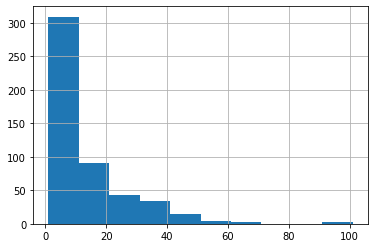

In [129]:
# 전체적인 데이터를 시각화 했을 때...
filmo['필모갯수'].hist(bins=10)

- 배우 성별에 따라 필모의 갯수가 다른 것도 알 수 있지만... x,y축의 기준(숫자) 자체가 다르다. 
- 여성의 같은 경우 75% 값이 15지만, 남성 같은 경우는 필모의 갯수가 19이기 때문이다... 

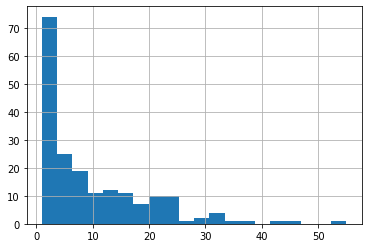

In [86]:
# 여자 배우 히스토그램
filmo_woman['필모갯수'].hist(bins=20)

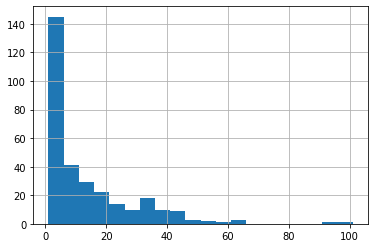

In [88]:
filmo_man['필모갯수'].hist(bins=20)

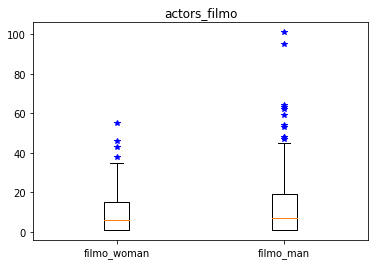

In [139]:
fig, ax = plt.subplots()

ax.boxplot([filmo_woman['필모갯수'], filmo_man['필모갯수']], sym="b*")

plt.title('actors_filmo')

plt.xticks([1, 2], 

           ['filmo_woman', 'filmo_man'])

plt.show()

In [140]:
actor_debut=pd.read_csv('..\data/actor_debut.csv')

# actor_debut 데이터.
성별에 따른 필모갯수 top 10(총 20개 데이터) 영화계 데뷔 경력을 기준으로 설정. 
- 가설) 여배우의 경력과 남배우의 경력을 비교했을 때, 경력과 무관하게 남자 배우가 더 필모갯수가 많을 것이다.

In [141]:
actor_debut.head()

,주연배우,배우성별,필모갯수,영화계_데뷔,경력
0,문소리,여자,55,1999,21
1,김해숙,여자,46,1981,39
2,라미란,여자,43,2005,15
3,이상희,여자,38,2010,10
4,김혜수,여자,35,1986,34


In [142]:
actor_debut

,주연배우,배우성별,필모갯수,영화계_데뷔,경력
0,문소리,여자,55,1999,21
1,김해숙,여자,46,1981,39
2,라미란,여자,43,2005,15
3,이상희,여자,38,2010,10
4,김혜수,여자,35,1986,34
5,정유미,여자,32,2003,17
6,윤여정,여자,31,1971,49
7,한예리,여자,31,2007,13
8,김꽃비,여자,31,2002,18
9,이주실,여자,30,1992,28
